<a href="https://colab.research.google.com/github/Psyclophe/Power-PDF/blob/master/2_PCA_Aprendizaje_no_supervisado_smm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Science
### Módulo 2 _ Machine Learning
### Aprendizaje no supervisado

# PCA - Reducción de Dimensionalidad
### `Skillsforindustry.org`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
#cargamos los datos de entrada
dataframe = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
dataframe.tail(20)
 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2220,6261,1979,Graduation,Married,58025.0,0,1,26-11-2013,81,270,...,4,0,0,0,0,0,0,3,11,0
2221,7366,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,...,1,0,1,1,0,0,0,3,11,1
2222,10659,1979,2n Cycle,Together,7500.0,1,0,07-05-2013,7,2,...,7,0,0,0,0,0,0,3,11,0
2223,1448,1963,Master,Married,33562.0,1,2,25-06-2014,33,21,...,4,0,0,0,0,0,0,3,11,0
2224,4286,1970,PhD,Single,57642.0,0,1,09-01-2014,24,580,...,4,1,0,0,0,0,0,3,11,0
2225,4749,1968,Graduation,Together,58554.0,1,1,26-09-2012,55,368,...,7,0,0,0,0,0,0,3,11,0
2226,4478,1979,Graduation,Married,63777.0,1,1,24-03-2013,87,457,...,8,0,0,0,0,0,0,3,11,0
2227,4201,1962,Graduation,Single,57967.0,0,1,03-03-2013,39,229,...,5,0,0,0,0,0,0,3,11,0
2228,8720,1978,2n Cycle,Together,NaN,0,0,12-08-2012,53,32,...,0,0,1,0,0,0,0,3,11,0
2229,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,...,7,0,0,0,0,0,0,3,11,0


In [14]:
dataframe.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012    

In [9]:
dataframe.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [16]:
print(dataframe.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [27]:
dataframe['Education'] = dataframe.Education.astype('category')
dataframe.dtypes

ID                        int64
Year_Birth                int64
Education              category
Marital_Status           object
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
dtype: object

In [32]:
from pandas.core.series import to_datetime
to_datetime(dataframe.Dt_Customer)

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [24]:
df=dataframe.fillna(52247.251354)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [37]:
dataframe['Marital_Status'] = dataframe.Marital_Status.astype('category')
dataframe.dtypes

ID                        int64
Year_Birth                int64
Education              category
Marital_Status         category
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
dtype: object

In [11]:
#fit_transform (obtiene la media y la desviación, y se lo aplica  a los datos)
mean = dataframe.mean(axis = 0)["ingresos"]
std = dataframe.std(axis = 0)["ingresos"]
(dataframe["ingresos"] - mean) / std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


KeyError: ignored

In [ ]:
#.transform (Aplica la formula)
(10 - mean) / std

-2.94081951688325

In [ ]:
#normalizamos los datos
scaler=StandardScaler()
df = dataframe.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo
X_scaled=scaler.fit_transform(df)

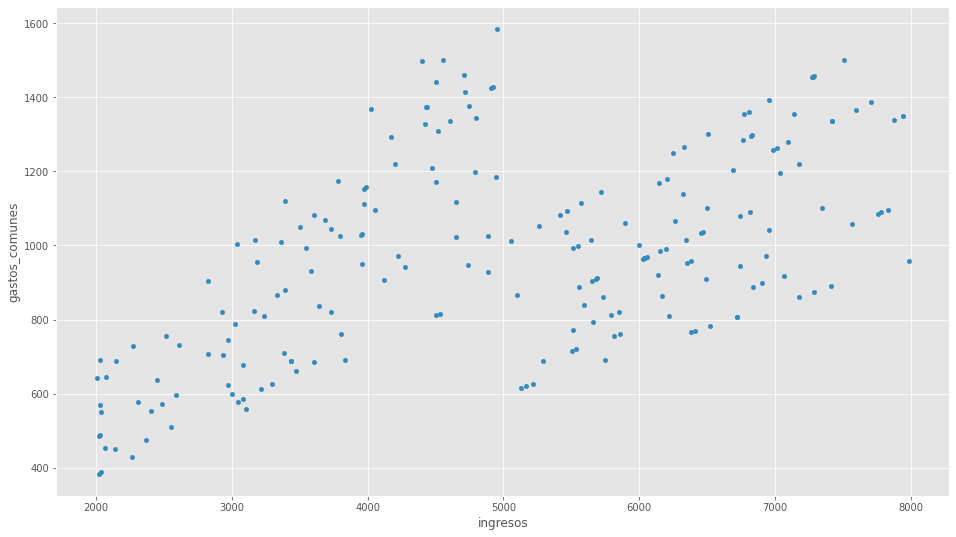

In [ ]:
df[["ingresos",	"gastos_comunes"]].plot.scatter(*["ingresos",	"gastos_comunes"])

In [ ]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [ ]:
pca.get_covariance()

array([[ 1.00497512,  0.5629981 , -0.11032655, -0.12472213,  0.71643609,
         0.61777897, -0.04276731, -0.02460492, -0.03904572],
       [ 0.5629981 ,  1.00497512, -0.05467034, -0.10037758,  0.21045568,
         0.20579933, -0.05743681, -0.07268108, -0.07948892],
       [-0.11032655, -0.05467034,  1.00497512,  0.01065519, -0.19426111,
        -0.09510155,  0.0524989 , -0.04508134,  0.01903984],
       [-0.12472213, -0.10037758,  0.01065519,  1.00497512, -0.06470463,
        -0.05484819, -0.02032621,  0.12546587,  0.04754858],
       [ 0.71643609,  0.21045568, -0.19426111, -0.06470463,  1.00497512,
         0.60884971, -0.06335265,  0.00145255, -0.02394761],
       [ 0.61777897,  0.20579933, -0.09510155, -0.05484819,  0.60884971,
         1.00497512, -0.11398447, -0.14263039, -0.21284321],
       [-0.04276731, -0.05743681,  0.0524989 , -0.02032621, -0.06335265,
        -0.11398447,  1.00497512,  0.51013414,  0.59244489],
       [-0.02460492, -0.07268108, -0.04508134,  0.12546587,  0

In [ ]:
pca.explained_variance_

array([2.70561424, 2.10697364, 1.05925553, 0.96649057, 0.87148938,
       0.50920879, 0.37495835, 0.27295496, 0.17783067])

In [ ]:
pca.explained_variance_.sum()

9.044776119402977

In [ ]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [ ]:
pca.explained_variance_ratio_

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [ ]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random

In [ ]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


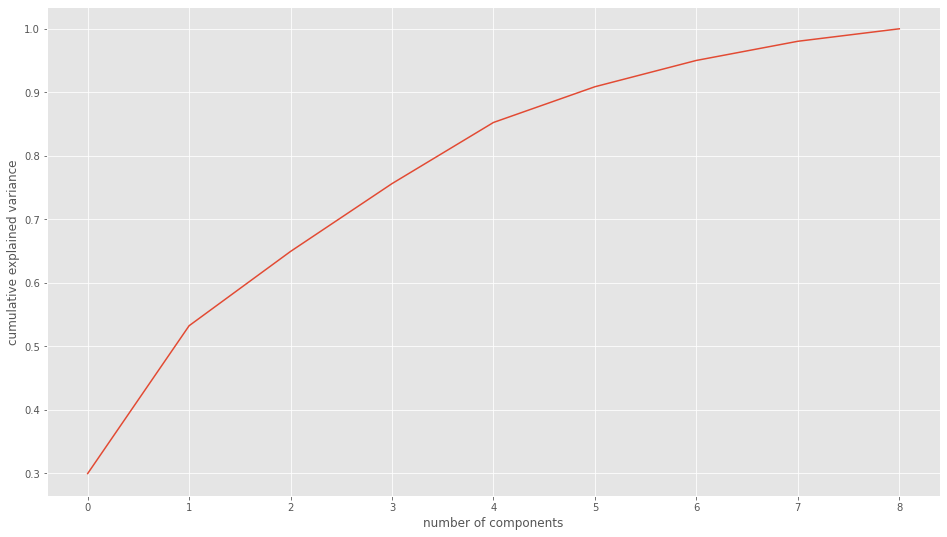

In [ ]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

En esta gráfica de variabilidad explicada acumulada, vemos que tomando los primeros 5 componentes llegamos al 85%

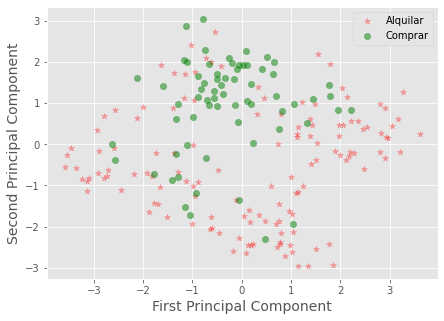

In [ ]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
#fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
    
    
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

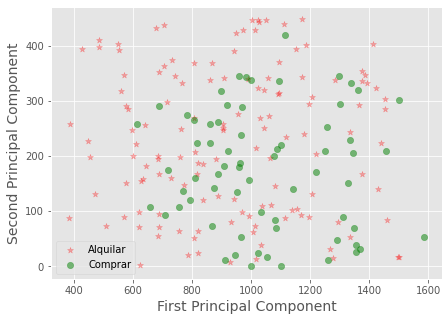

In [ ]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=dataframe.iloc[:, 1].values
Yax=dataframe.iloc[:, 2].values
labels=dataframe['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
#fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
    
    
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

Aquí vemos que al reducir las 9 dimensiones iniciales a tan sólo 2 logramos darnos una idea de dónde visualizar nuestras predicciones para comprar o alquilar casa.

## Conclusiones Finales

Con PCA obtenemos:

* una medida de como cada variable se asocia con las otras (matriz de covarianza)
* La dirección en las que nuestros datos están dispersos (autovectores)
* La relativa importancia de esas distintas direcciones (autovalores)

PCA combina nuestros predictores y nos permite deshacernos de los autovectores de menor importancia relativa.